In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import redpandda
from redpandda import *

import resicon
from resicon import *

import geostas
import mdtraj

import MDAnalysis as mda 

import visualizations
import comodo
import hdbscan
import time


In [2]:
from redpandda import preprocessing, preprocess_protein_trajectory
import redpandda_general
from clustering_functions import clustering_workflow

In [3]:
dcd_file1 = "1hhp.dcd"
dcd_file2 = "1hhp-lan-g2.dcd"
multipdb_file = "1hhp_trj.pdb"
plot_distro_heatmaps = False

In [4]:
#md_trajectory_info = ['trajectory-1.xtc','fs-peptide.pdb','McGibbon/',10000,4,'mcgib_traj1_geostas_4k.csv','Ace']
protease_path = os.path.join("HIV1Protease/")
protease1_pdb = [os.path.join(protease_path, "1hhp_trj.pdb"),None,'',-1,4,None,'protease_pdb']
md_trajectory_info = protease1_pdb

md_trajectory_info = [dcd_file1,"1hhp_trj.pdb",protease_path,None,None,None,'HIV']


protease1_pdb = [protease1_pdb]
protease1_dcd = [os.path.join(protease_path, dcd_file2),os.path.join(protease_path, "1hhp.pdb"),'',-1,4,None,'protease_dcd']

protease1_dcd = [protease1_dcd]
#md_trajectory_info = protease1_pdb

#how many frames to process
frames_count = md_trajectory_info[3]

md_trajectory_info_dcd = md_trajectory_info.copy()
md_trajectory_info_dcd[0] = dcd_file1

pdb_trajectory_info = ["1hhp.pdb","1hhp.pdb",protease_path,None,None,None,'HIV']


In [5]:
md_trajectory_info

['1hhp.dcd', '1hhp_trj.pdb', 'HIV1Protease/', None, None, None, 'HIV']

In [6]:

trajectory_file = md_trajectory_info[0].split()[0]
pdb_file = md_trajectory_info[1].split()[0]

In [7]:
save_filename = trajectory_file + "_v2_plus_agglo_" + pdb_file + ".pickle"
save_filename_csv = trajectory_file + "_v2_plus_agglo_" + pdb_file + ".csv"

In [8]:
# call MD-related preprocessing
traj_array, k_cluster = preprocess_protein_trajectory(md_trajectory_info)

In [9]:
clustering_names = []
clustering_results = []

In [10]:
matrices_to_apply = ["delta",  "delta+1std", "delta+2std", "stddv"]
clusterings_to_apply = [
    {
        "name": "Spectral",
        "method": "spectral",
        "params": {"cluster_count": k_cluster}
    },
        {
        "name": "HDBSCAN",
        "method": "hdbscan",
        "params": {}
    },
        {
        "name": "Affinity",
        "method": "affinity",
        "params": {}
    }
    ,
        {
        "name": "Agglomerative",
        "method": "agglomerative",
        "params": {"cluster_count": k_cluster}
    },
    {
        "name": "Agglomerative",
        "method": "agglomerative",
        "params": {}
    }
]


In [11]:
clusterings_to_apply

[{'name': 'Spectral', 'method': 'spectral', 'params': {'cluster_count': 14}},
 {'name': 'HDBSCAN', 'method': 'hdbscan', 'params': {}},
 {'name': 'Affinity', 'method': 'affinity', 'params': {}},
 {'name': 'Agglomerative',
  'method': 'agglomerative',
  'params': {'cluster_count': 14}}]

In [12]:
res = clustering_workflow(traj_array, matrices_to_apply, clusterings_to_apply, post_process_noise= True)

0.0385
0.0172
0.0414
0.0108
0.0107
0.0296
0.0182
0.0117
0.0279
0.0100
0.0160
0.0291


In [13]:
res

[{'name': 'Spectral',
  'method': 'spectral',
  'params': {'cluster_count': 14},
  'matrix': 'delta',
  'clustering': array([10, 10, 10, 10, 10, 10, 10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  6,  6,  6, 12,  4,  6,  6,  6,  6,  6,  6,
         11, 11,  7,  7,  7,  7,  7,  7,  7,  7,  7,  2,  2,  2,  2,  2,  2,
          2, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  3,  3,  3, 13,  3,  3,  3,  3,  3,  3,  3,  3, 13, 13, 13,
         13, 13, 13, 13, 13, 13,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
          9,  9,  9,  9,  6, 12,  6, 12, 12, 12, 12, 12, 12, 12,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  7,  7,  7,  2,  2,  2,  2,  2,  2,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
          4,  5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12, 12, 12, 12, 12,  3,
          3,  3, 10,  3,  3,  3,  3, 

In [14]:
# create matrices for plotting
dist_matrices = redpandda_general.get_distance_matrices(traj_array)
delta_matrices = redpandda_general.get_delta_matrices(dist_matrices)
delta_matrices_wo_absolute = redpandda_general.get_delta_matrices_wo_absolute(dist_matrices)


average_delta_matrix = redpandda_general.calculate_average_delta_matrix(delta_matrices)
average_delta_matrix_wo_absolute = redpandda_general.calculate_average_delta_matrix(delta_matrices_wo_absolute)

average_distance_matrix = redpandda_general.calculate_average_delta_matrix(dist_matrices)

std_distance_matrix = redpandda_general.get_std_matrices(dist_matrices)
std_delta_matrix = redpandda_general.get_std_matrices(delta_matrices)

stddv_matrices = redpandda_general.get_stddv(dist_matrices)


summed_delta_matrix_1std = average_delta_matrix + std_delta_matrix 
summed_delta_matrix_2std = average_delta_matrix + std_delta_matrix * 2

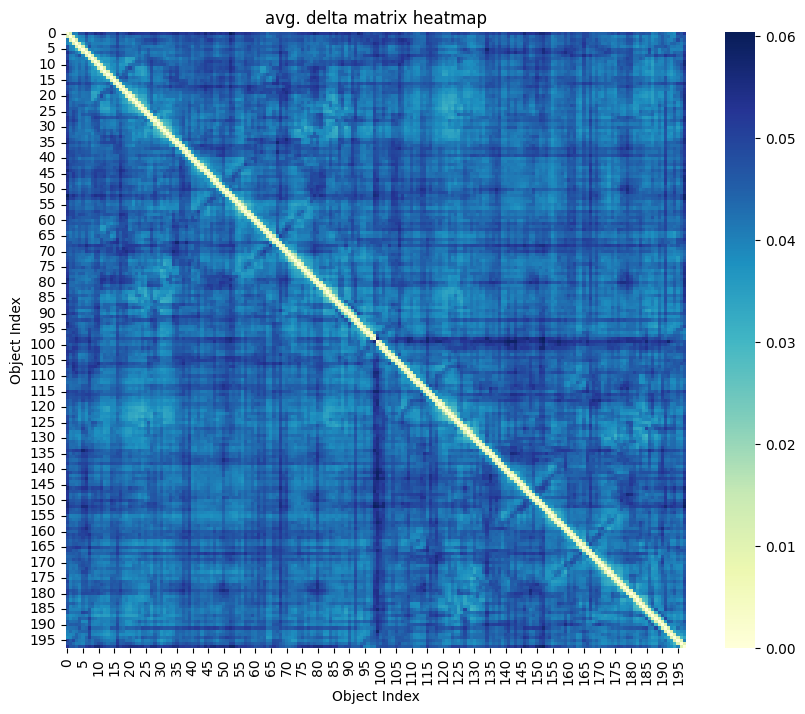

In [15]:
dm.create_delta_heatmap(average_delta_matrix)

In [16]:
for clustering in res:
    curr_clustering = clustering["clustering"]
    Q, _ = cc.get_Q_for_clustering(dist_matrices, curr_clustering, k_cluster)
    clustering["Q"] = Q

## Q values for all clustering methods (lower means better)

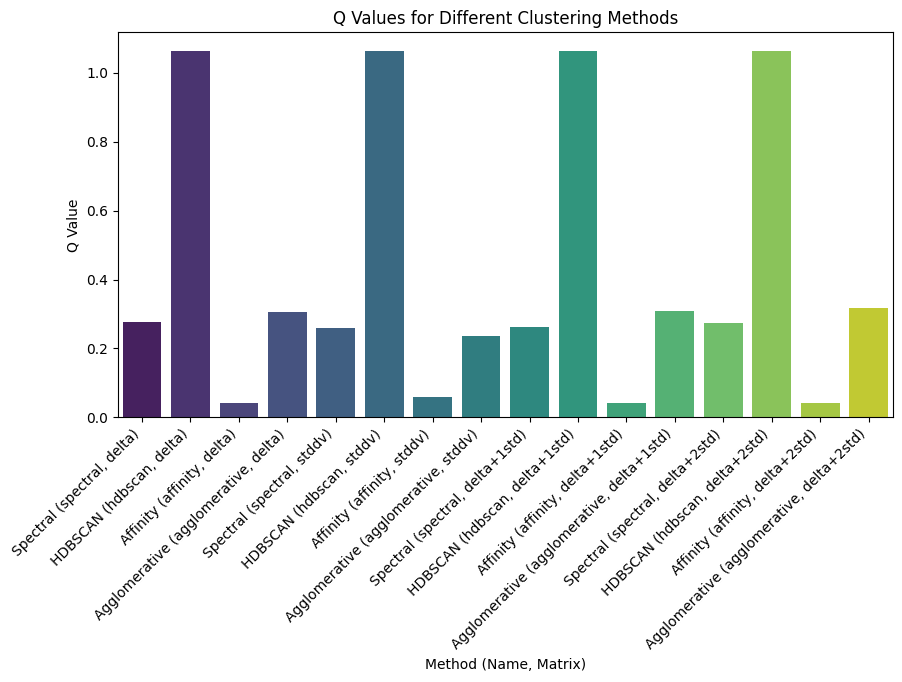

In [17]:
import seaborn as sns
labels = [f"{entry['name']} ({entry['method']}, {entry['matrix']})" for entry in res]
Q_values = [entry['Q'] for entry in res]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

In [18]:
##### example for postprocessing - is already done in function called above

In [19]:

clustering_hdbscan = res[1]["clustering"]
if -1 in clustering_hdbscan:
    from postprocess_clusterings import assign_noise_points
    final_clustering_hdbscan = assign_noise_points(distance_matrix=delta_matrices, cluster_labels=clustering_hdbscan)

### Visualization of clusterings for each residue
#### clusters are coloured in such a way that the overlap is maximized to facilitate comparison

[array([10, 10, 10, 10, 10, 10, 10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  6,  6,  6, 12,  4,  6,  6,  6,  6,  6,  6,
       11, 11,  7,  7,  7,  7,  7,  7,  7,  7,  7,  2,  2,  2,  2,  2,  2,
        2, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  3,  3,  3, 13,  3,  3,  3,  3,  3,  3,  3,  3, 13, 13, 13,
       13, 13, 13, 13, 13, 13,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  6, 12,  6, 12, 12, 12, 12, 12, 12, 12,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  7,  7,  7,  2,  2,  2,  2,  2,  2,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12, 12, 12, 12, 12,  3,
        3,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

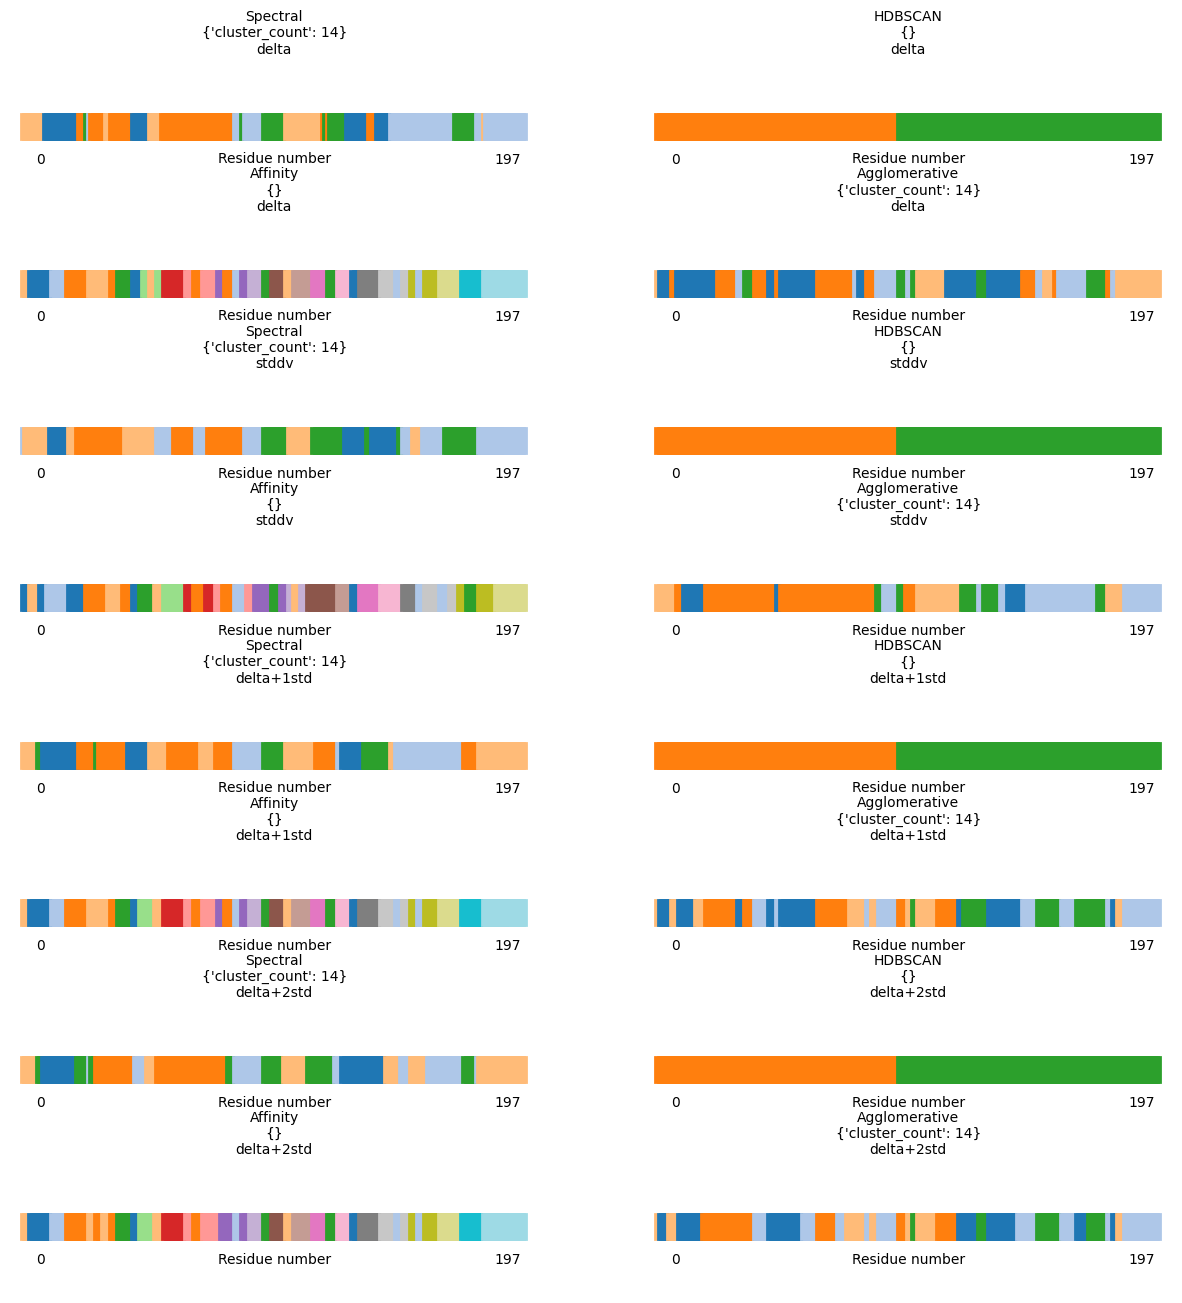

In [20]:
visualizations.line_plot_workflow([item["clustering"] for item in res], titles = [str(item["name"]  + "\n" + str(item["params"]) + "\n" + item["matrix"]) for item in res], full_title = "FS-peptide", rearrange = True, hdb_scan_noise=True, num_cols=2)

# Additional methods - Resicon

In [21]:
resi_dict = dict()


start_time = time.time()

resi_clustering = resicon(md_trajectory_info[0],md_trajectory_info[1],md_trajectory_info[2],k_cluster, only_CA=True)
curr_time = time.time() - start_time 
resi_dict["runtime"] = curr_time

resi_dict["name"] = "Resicon"
resi_dict["method"] = "Resicon"
resi_dict["params"] = ""
resi_dict["clustering"] = np.array(resi_clustering)

Q, _ = cc.get_Q_for_clustering(dist_matrices, resi_dict["clustering"], k=len(np.unique(resi_clustering)))
resi_dict["Q"] = Q
res.append(resi_dict)



5.7836
Resicon residue:
PRO
0
Resicon residue:
GLN
1
Resicon residue:
ILE
2
Resicon residue:
THR
3
Resicon residue:
LEU
4
Resicon residue:
TRP
5
Resicon residue:
GLN
6
Resicon residue:
ARG
7
Resicon residue:
PRO
8
Resicon residue:
LEU
9
Resicon residue:
VAL
10
Resicon residue:
THR
11
Resicon residue:
ILE
12
Resicon residue:
LYS
13
Resicon residue:
ILE
14
Resicon residue:
GLY
15
Resicon residue:
GLY
16
Resicon residue:
GLN
17
Resicon residue:
LEU
18
Resicon residue:
LYS
19
Resicon residue:
GLU
20
Resicon residue:
ALA
21
Resicon residue:
LEU
22
Resicon residue:
LEU
23
Resicon residue:
ASP
24
Resicon residue:
THR
25
Resicon residue:
GLY
26
Resicon residue:
ALA
27
Resicon residue:
ASP
28
Resicon residue:
ASP
29
Resicon residue:
THR
30
Resicon residue:
VAL
31
Resicon residue:
LEU
32
Resicon residue:
GLU
33
Resicon residue:
GLU
34
Resicon residue:
MET
35
Resicon residue:
SER
36
Resicon residue:
LEU
37
Resicon residue:
PRO
38
Resicon residue:
GLY
39
Resicon residue:
ARG
40
Resicon residue:
TR

# Additional methods - Comodo

In [22]:
import visualizations
import comodo

In [23]:
md_trajectory_info[0]

'1hhp.dcd'

In [24]:
try:
    comodo_dict = dict()

    start_time = time.time()

    com_pd_eln = comodo.full_comodo_clustering(os.path.join("trajdata", protease1_pdb[0][0]), elastic_network=True)
    curr_time = time.time() - start_time 
    comodo_dict["runtime"] = curr_time

    comodo_dict["name"] = "Comodo"
    comodo_dict["method"] = "Comodo"
    comodo_dict["params"] = "Elastic Network"
    comodo_dict["clustering"] = np.array(com_pd_eln)
    Q, _ = cc.get_Q_for_clustering(dist_matrices, comodo_dict["clustering"], k=len(np.unique(com_pd_eln)))
    comodo_dict["Q"] = Q
    res.append(comodo_dict)
except:
    print("Problem with Comodo Elastic Network!")

Name of cov-file: ftrajdata/HIV1Protease/1hhp_trj.cov


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In gnm.pdb(list(atom = list(type = c("ATOM", "ATOM", "ATOM", "ATOM",  :
R[write to console]: 
 
R[write to console]:  multimodel PDB file detected - using only first frame

R[write to console]: 2: 
R[write to console]: In gnm.pdb(list(atom = list(type = c("ATOM", "ATOM", "ATOM"

Name of output file: trajdata/HIV1Protease/1hhp_trj.cov
{1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 2: [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182], 3: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155], 4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 122, 123, 124, 125, 126, 127, 128, 129, 130, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]}


In [25]:
try:
    comodo_dict = dict()

    start_time = time.time()
    com_pd_no_eln = comodo.full_comodo_clustering(md_trajectory_info_dcd, elastic_network=False)

    curr_time = time.time() - start_time 
    comodo_dict["runtime"] = curr_time


    comodo_dict["name"] = "Comodo"
    comodo_dict["method"] = "Comodo"
    comodo_dict["params"] = "Full Covariance Matrix"
    comodo_dict["clustering"] = np.array(com_pd_no_eln)
    Q, _ = cc.get_Q_for_clustering(dist_matrices, comodo_dict["clustering"], k=len(np.unique(com_pd_eln)))
    comodo_dict["Q"] = Q
    res.append(comodo_dict)
except:
    print("Problem with Comodo w/o Elastic Network!")

Name of cov-file: ftrajdata/HIV1Protease/1hhp.cov
traj
['1hhp.dcd', '1hhp_trj.pdb', 'HIV1Protease/', None, None, None, 'HIV']
1hhp.dcd
orig. covariance_matrix
[[0.02723924 0.01327173 0.00845879 ... 0.00456759 0.00628507 0.00737578]
 [0.01327173 0.01544107 0.00771775 ... 0.00494504 0.0062555  0.00556444]
 [0.00845879 0.00771775 0.01264133 ... 0.00395983 0.00378303 0.00343936]
 ...
 [0.00456759 0.00494504 0.00395983 ... 0.00891745 0.0066152  0.00619907]
 [0.00628507 0.0062555  0.00378303 ... 0.0066152  0.01099241 0.00973528]
 [0.00737578 0.00556444 0.00343936 ... 0.00619907 0.00973528 0.01761864]]
Name of output file: trajdata/HIV1Protease/1hhp.cov
Covariance dataframe:
       Atom_Index_1  Atom_Index_2  Covariance
0                 1             1    0.027239
1                 1             2    0.013272
2                 1             3    0.008459
3                 1             4    0.004312
4                 1             5    0.002108
...             ...           ...         ...
3

# Additional methods - GeoStas

In [26]:
from geostas import *
geostas_dict = dict()

start_time = time.time()

geostas_clusters = compute_geostas_clusters_multipdb(filename=os.path.join("trajdata", md_trajectory_info_dcd[2], multipdb_file), only_CA=True, k=k_cluster)


curr_time = time.time() - start_time 
geostas_dict["runtime"] = curr_time

geostas_dict["name"] = "Geostas"
geostas_dict["method"] = "Geostas"
geostas_dict["params"] = ""
geostas_dict["clustering"] = np.array(geostas_clusters)
Q, _ = cc.get_Q_for_clustering(dist_matrices, geostas_dict["clustering"], k=len(np.unique(geostas_clusters)))
geostas_dict["Q"] = Q
res.append(geostas_dict)

  .. 198 'calpha' atoms selected
  .. 'xyz' coordinate data with 1001 frames 
  .. 'fit=TRUE': running function 'core.find'
  .. coordinates are superimposed to core region
  .. calculating atomic movement similarity matrix ('amsm.xyz()') 
  .. dimensions of AMSM are 198x198
  .. clustering AMSM using 'kmeans' 
  .. converting indices to match input 'pdb' object 
     (additional attribute 'atomgrps' generated) 


# Save Files

In [27]:
import pickle

with open(save_filename, 'wb') as pickle_file:
    pickle.dump(res, pickle_file)

df = pd.DataFrame(res)
df.to_csv(save_filename_csv, index=False)

In [28]:
df

,name,method,params,matrix,clustering,runtime,Q
0,Spectral,spectral,{'cluster_count': 14},delta,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, ...",0.238832,0.277127
1,HDBSCAN,hdbscan,{},delta,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.217429,1.064369
2,Affinity,affinity,{},delta,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...",0.242033,0.042096
3,Agglomerative,agglomerative,{'cluster_count': 14},delta,"[7, 10, 10, 10, 10, 10, 9, 9, 10, 10, 10, 10, ...",0.202108,0.306730
4,Spectral,spectral,{'cluster_count': 14},stddv,"[8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, ...",0.084369,0.258859
5,HDBSCAN,hdbscan,{},stddv,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.084315,1.064369
6,Affinity,affinity,{},stddv,"[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, ...",0.103257,0.058221
7,Agglomerative,agglomerative,{'cluster_count': 14},stddv,"[8, 8, 12, 12, 12, 12, 12, 12, 0, 0, 0, 6, 6, ...",0.075364,0.235909
8,Spectral,spectral,{'cluster_count': 14},delta+1std,"[4, 4, 4, 4, 4, 4, 10, 10, 5, 5, 5, 5, 5, 5, 5...",0.218436,0.261189
9,HDBSCAN,hdbscan,{},delta+1std,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.211934,1.064369


# Further analyses

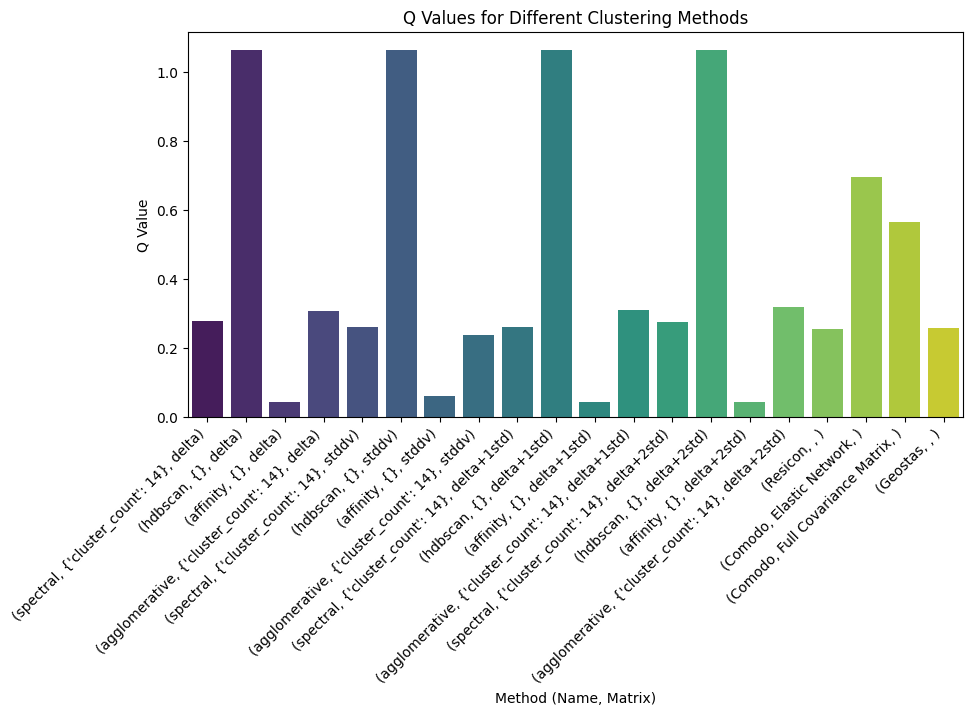

In [29]:
import seaborn as sns
labels = [f"({entry['method']}, {entry['params']}, {entry.get('matrix', '')})" for entry in res]
Q_values = [entry['Q'] for entry in res]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

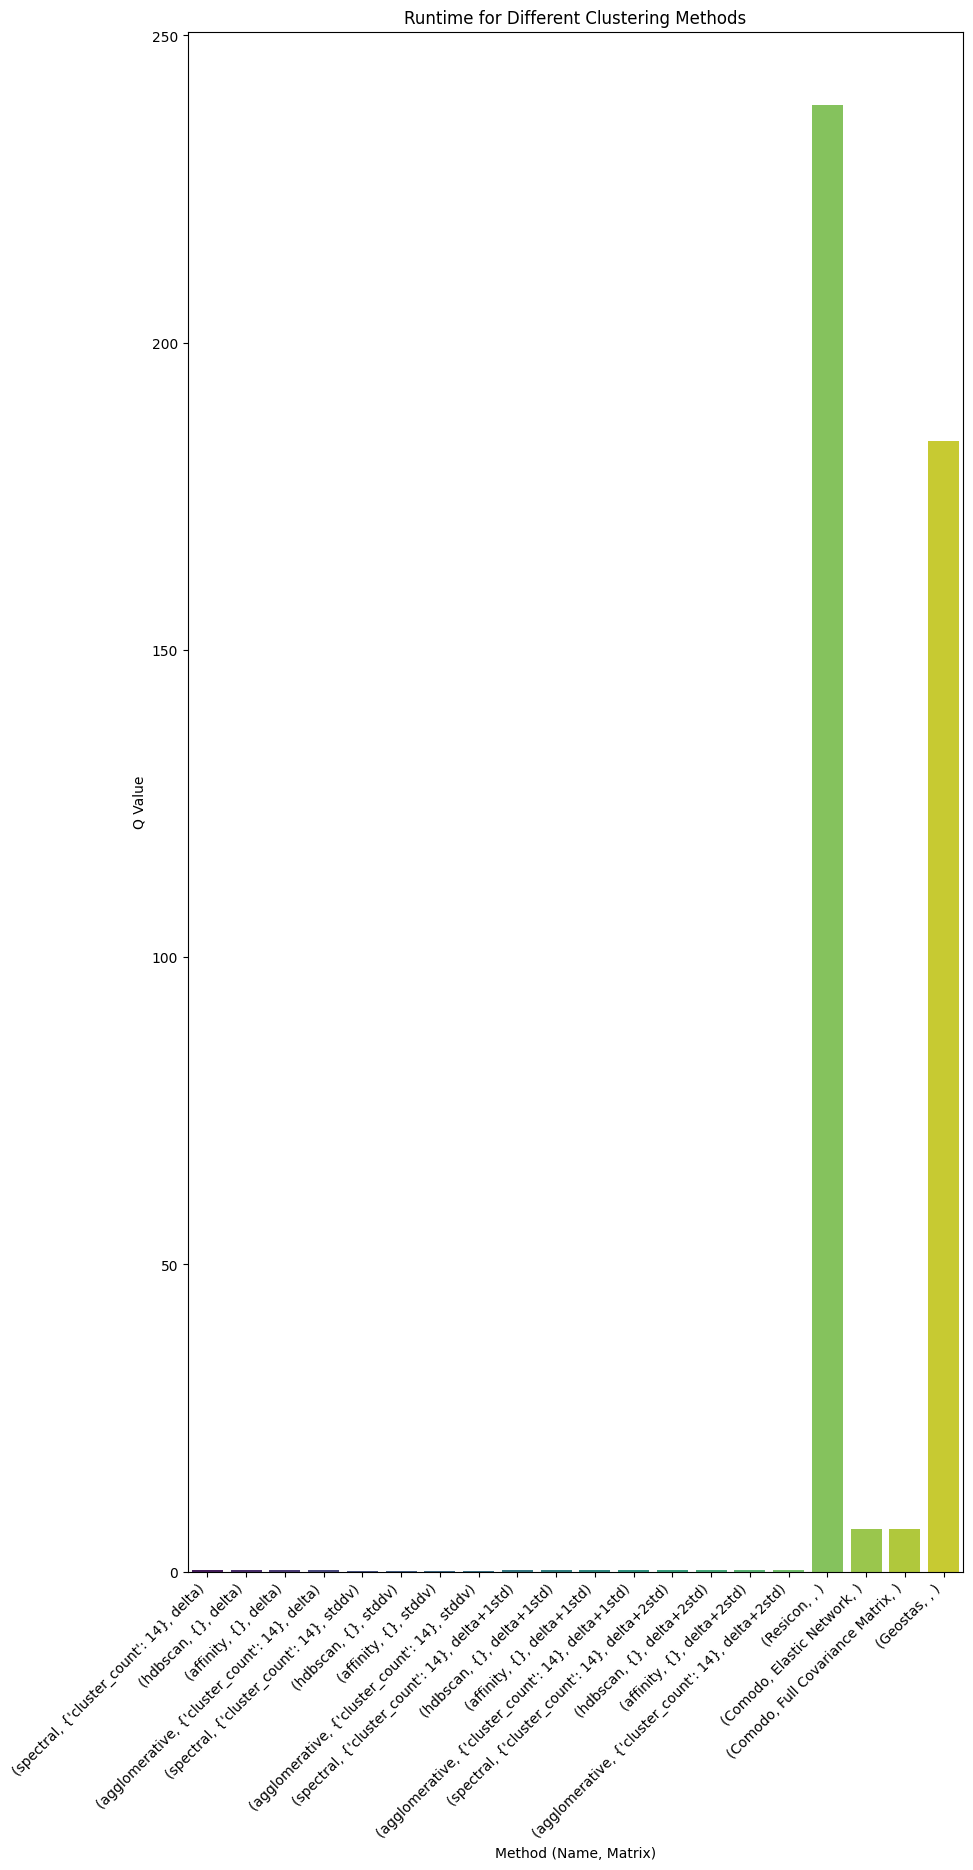

In [30]:
import seaborn as sns
labels = [f"({entry['method']}, {entry['params']}, {entry.get('matrix', '')})" for entry in res]
runtimes = [entry['runtime'] for entry in res]

# Plot
plt.figure(figsize=(10, 20))
sns.barplot(x=labels, y=runtimes, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title("Runtime for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

### For the next steps (visualizing of RMSD etc.), we select Spectral Clustering with 4 clusters

In [31]:
spectral_clustering_res = res[0]["clustering"]

In [32]:
from compare_clusterings import *

In [33]:
max_rmse_wo_clustering = get_Q_max_RMSE_wo_clustering(delta_matrices)

In [34]:
spectral_clustering_res

array([10, 10, 10, 10, 10, 10, 10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  6,  6,  6, 12,  4,  6,  6,  6,  6,  6,  6,
       11, 11,  7,  7,  7,  7,  7,  7,  7,  7,  7,  2,  2,  2,  2,  2,  2,
        2, 11, 11, 11, 11, 11,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  3,  3,  3, 13,  3,  3,  3,  3,  3,  3,  3,  3, 13, 13, 13,
       13, 13, 13, 13, 13, 13,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  6, 12,  6, 12, 12, 12, 12, 12, 12, 12,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  7,  7,  7,  2,  2,  2,  2,  2,  2,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12, 12, 12, 12, 12,  3,
        3,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3])

In [35]:
max_rmse_for_clustering = get_Q_max_RMSE_for_clustering(delta_matrices, spectral_clustering_res, len(np.unique(spectral_clustering_res)))

In [36]:
traj_array_pdb, k_cluster_pdb = preprocess_protein_trajectory(pdb_trajectory_info)

# For this protein we have an additional pdb-file: We can take this as reference

In [37]:
pdb_dist = redpandda_general.get_distance_matrices(traj_array_pdb)

In [38]:
get_total_rmses_for_frames, cluster_rmses, clusters_mean_rmses = get_RMSE_of_clusters_and_total(pdb_dist, dist_matrices,spectral_clustering_res, len(np.unique(spectral_clustering_res)))

# Plotting of the average RMSE of COMET clusters against the RMSE without clustering

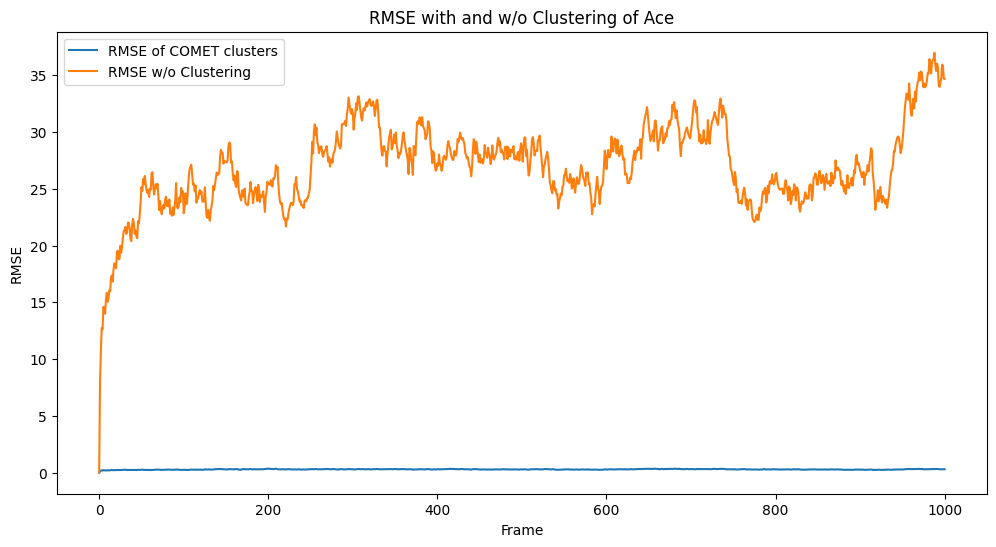

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(clusters_mean_rmses, label="RMSE of COMET clusters")
plt.plot(get_total_rmses_for_frames, label="RMSE w/o Clustering")

plt.xlabel('Frame')  
plt.ylabel('RMSE')  

plt.title('RMSE with and w/o Clustering of Ace') 

plt.legend()

plt.show()

# Plotting of the RMSE of all COMET clusters against the RMSE without clustering

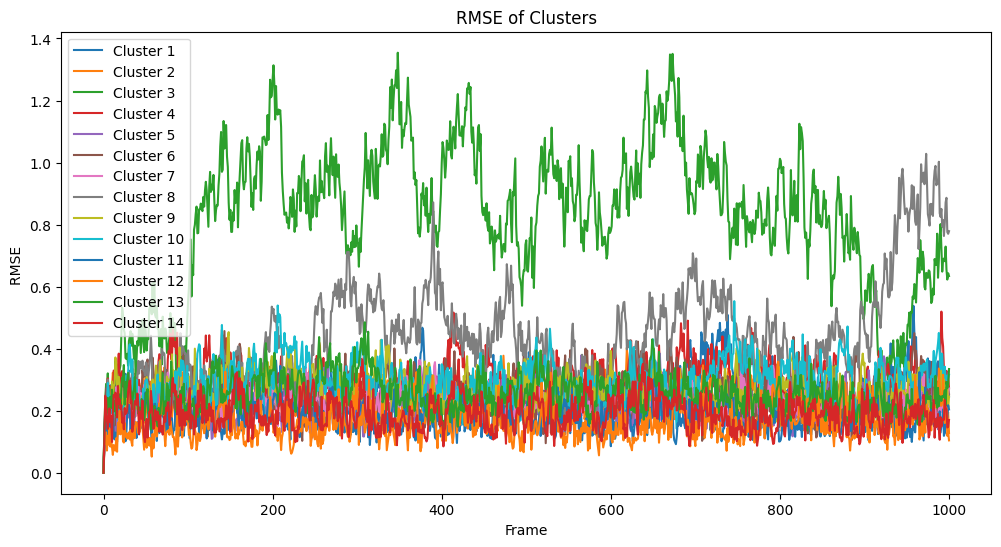

In [40]:
plt.figure(figsize=(12, 6))
for i, cluster_rmse in enumerate(cluster_rmses):    
    plt.plot(cluster_rmse, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSE ')  

plt.title('RMSE of Clusters') 

plt.legend()

plt.show()

### Furthermore, we can compute the sum of all delta matrices and compare this to the RMSE.

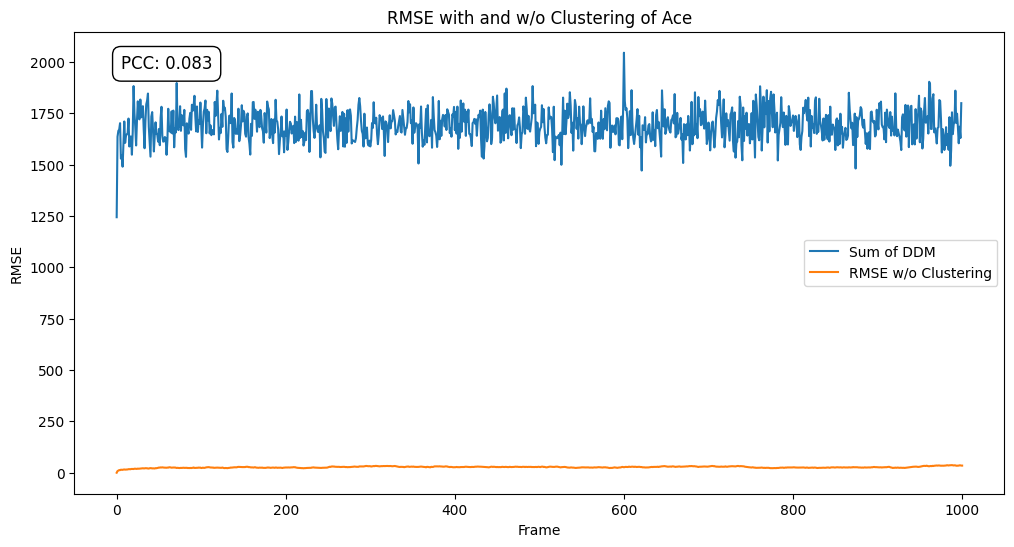

In [41]:


import scipy
def get_sdm_batches(summed_delta_matrices,get_total_rmses_for_frames,batch_size = 10):
    batched_summed_delta_matrices = []
    batched_get_total_rmses_for_frames = []
    for i in range(0, len(summed_delta_matrices), batch_size):
        try:
            batched_summed_delta_matrices.append(np.mean(summed_delta_matrices[i:i+batch_size]))
            batched_get_total_rmses_for_frames.append(np.mean(get_total_rmses_for_frames[i:i+batch_size]))
        except:
            pass
    return batched_summed_delta_matrices, batched_get_total_rmses_for_frames


summed_delta_matrices= []
for delta_matrix in delta_matrices:
    summed_delta_matrices.append(dm.sum_up_matrices(delta_matrix.flatten()))

batched_summed_delta_matrices, batched_get_total_rmses_for_frames = get_sdm_batches(summed_delta_matrices,get_total_rmses_for_frames)

pcc = scipy.stats.pearsonr(batched_summed_delta_matrices,batched_get_total_rmses_for_frames )[0]


plt.figure(figsize=(12, 6))
plt.plot(summed_delta_matrices, label="Sum of DDM")
plt.plot(get_total_rmses_for_frames, label="RMSE w/o Clustering")

plt.xlabel('Frame')  
plt.ylabel('RMSE')  

plt.title('RMSE with and w/o Clustering of Ace') 


plt.text(
    0.05,  # x-position (percentage of the x-axis range)
    0.95,  # y-position (percentage of the y-axis range)
    f'PCC: {pcc:.3f}',  # Text to display with 3 decimal places
    transform=plt.gca().transAxes,  # Use axis coordinate system (0-1 range)
    fontsize=12,  # Font size of the text
    verticalalignment='top',  # Position the text at the top
    horizontalalignment='left',  # Position the text on the left side
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Box around the text for clarity
)


plt.legend()

plt.show()

##### Only relabeling of the clustering labels array - because code excepts to start clusterings with 0

In [42]:
# Original array
arr = np.array(spectral_clustering_res).copy()

# Get the unique values, sort them, and create a mapping
unique_values = sorted(np.unique(arr))

# Create a mapping of original values to the new labels
mapping = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to the array
relabeled_array = np.vectorize(mapping.get)(arr)




### Finally, we can plot the RMSD of clusters against a reference frame of the trajectory (for this frame, the RMSD is, of course, 0) or against the average structure (in case no reference_frame-parameter is passed)

In [43]:
Q_from_pos_trajectory_average = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition=None, return_raw=True)
Q_from_pos_trajectory_reference_frame = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition=None, reference_frame=0, return_raw=True)
Q_from_pos_trajectory_reference_frame_1000 = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition=None, reference_frame=1000, return_raw=True)


Q_from_pos_trajectory_average_kabsch = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="Kabsch",  return_raw=True)
Q_from_pos_trajectory_reference_frame_kabsch = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="Kabsch", reference_frame=0, return_raw=True)
Q_from_pos_trajectory_reference_frame_1000_kabsch = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="Kabsch", reference_frame=1000, return_raw=True)


Q_from_pos_trajectory_average_procrustes = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="procrustes",  return_raw=True)
Q_from_pos_trajectory_reference_frame_procrustes = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="procrustes", reference_frame=0, return_raw=True)
Q_from_pos_trajectory_reference_frame_1000_procrustes = get_RMSD_to_reference(traj_array, relabeled_array, apply_superimposition="procrustes", reference_frame=1000, return_raw=True)

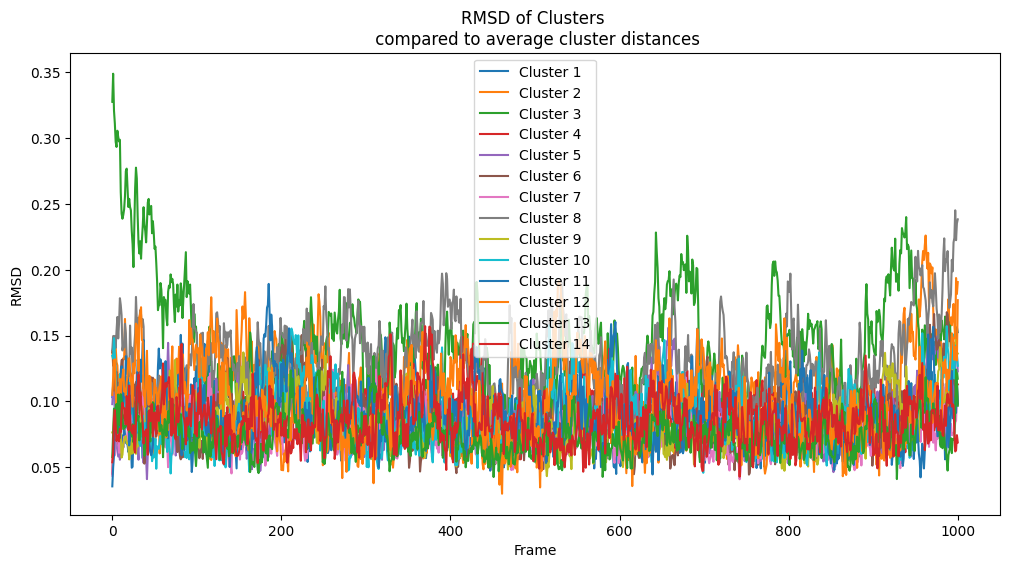

In [44]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_average):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to average cluster distances') 

plt.legend()

plt.show()

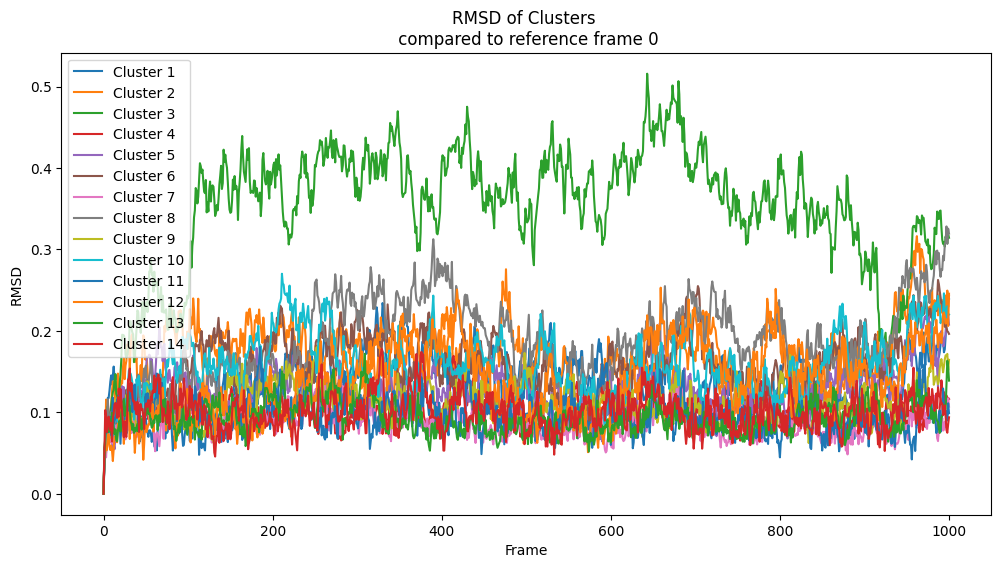

In [45]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 0') 

plt.legend()

plt.show()

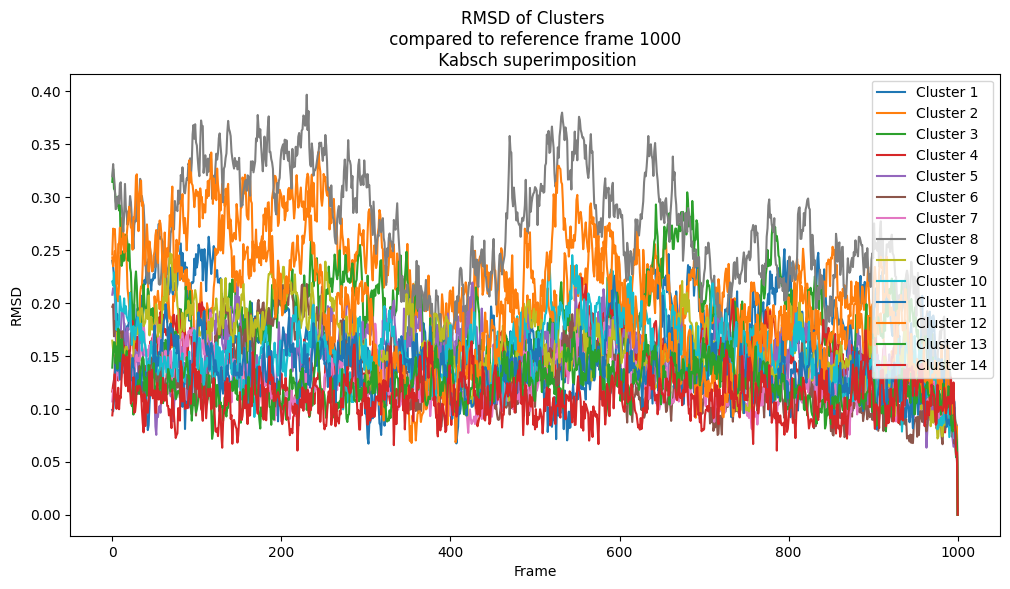

In [46]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame_1000_kabsch):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 1000 \n Kabsch superimposition') 

plt.legend()

plt.show()

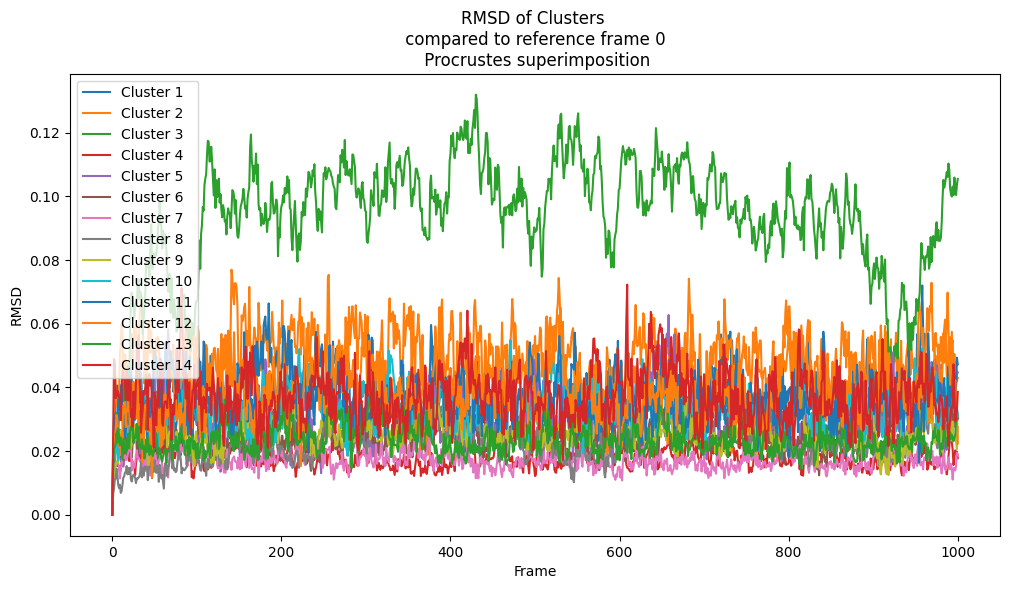

In [47]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame_procrustes):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 0 \n Procrustes superimposition') 

plt.legend()

plt.show()

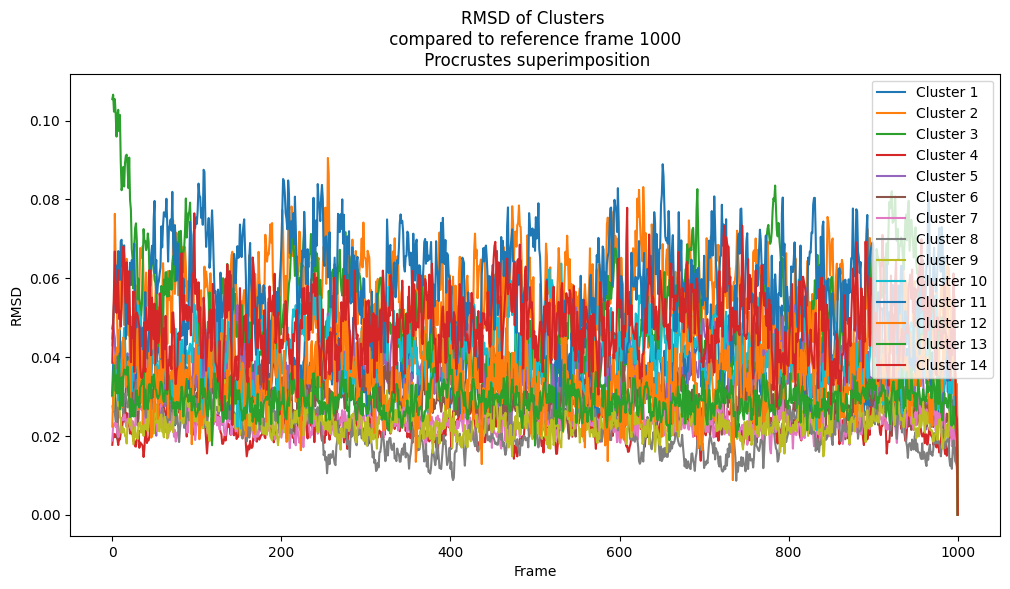

In [48]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_reference_frame_1000_procrustes):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to reference frame 1000 \n Procrustes superimposition') 

plt.legend()

plt.show()

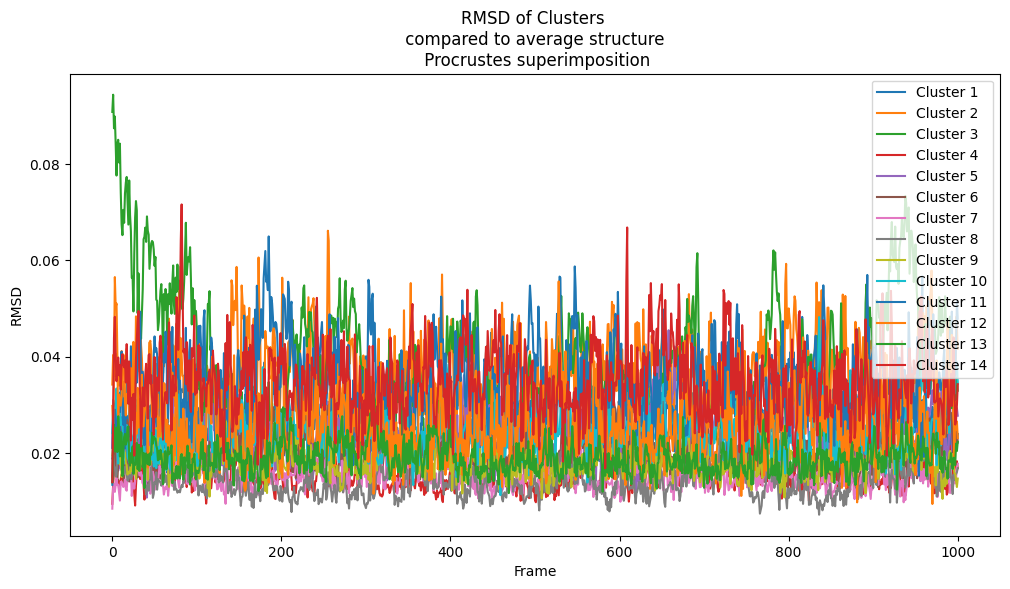

In [49]:
plt.figure(figsize=(12, 6))
for i, cluster_q in enumerate(Q_from_pos_trajectory_average_procrustes):    
    plt.plot(cluster_q, label=f'Cluster {i+1}')

plt.xlabel('Frame')  
plt.ylabel('RMSD')  

plt.title('RMSD of Clusters \n compared to average structure \n Procrustes superimposition') 

plt.legend()

plt.show()

In [50]:
from timestep_clustering import *

#### Finally, we can refine the result by iterative clustering of time segments. We get the time segments from detecting changes in the Q-values of the clusters (as plotted above). For each time segment, we repeat the clustering. For the small protein, the clusterings are very similar for each time segment, but for trajectories with major changes, the clusterings will be highly different. To obtain consistent clusters, we apply the Munkres-algorithm: The clustering labels are reorded in such a way that the overlap is maximized.
For HIV, no time segments are found

In [51]:
timestep_clusters, final_Qs = iterative_clustering_approach(traj_array, delta_matrices, Q_from_pos_trajectory_average_procrustes, compute_Q=True, k_cluster=k_cluster)

0.0189
clustering for timestep 0 - 1001: [ 0  0  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3 11  5  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10  7  7
  7  7  7 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 13 13  9  9  9  9  9  9  9  9  9  9  9  2  2  2  2  2  2  2  2  2
  2  2  2  8  8  8  8  8  8  8  8  8  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  9 11  9 11 11 11 11 11 11 11 11  6  6  6  6  6  6  6  6  6  6
  6  7  7  7  7  7  7  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  4  4  4  4  4  4 11 11 11 11 11 11 11 11 11  2  0  2  0  0  0
  0  0  0  2  2  2]
No change points found!
